In [3]:
# Load necessary packages
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.graphics.gofplots as smg

## Measuring Association Between Pairs of Variables

A **correlation matrix** is a table that shows the correlation coefficients between each pair of variables. A correlation matrix for a collection of $n$ variables $X_{1}, X_{2}, ...X_{n}$  is an $n X n$  matrix where the $ij^{th}$ entry is the correlation coefficient of $X_{i}$ and $X_{j}$ . Note that the diagonal entries are always 1 because the correlation between a variable and itself is . Further, the correlation matrix is symmetric. That is, the $ij^{th}$ entry is the same as the $ji^{th}$ entry.

In [6]:
scores = pd.read_csv("ExamScores.csv")
print(scores[['Exam1','Exam2','Exam3','Exam4']].corr())

          Exam1     Exam2     Exam3     Exam4
Exam1  1.000000  0.078613  0.256859  0.261306
Exam2  0.078613  1.000000  0.271642  0.318124
Exam3  0.256859  0.271642  1.000000  0.277656
Exam4  0.261306  0.318124  0.277656  1.000000


## Fit Linear Model with Multiple Predictors

In [8]:
# Load data
df = pd.read_csv("https://data-analytics.zybooks.com/mtcars.csv")
df_cars = df[["mpg", "wt", "qsec"]]

After obtaining the DataFrame, we use the `ols` function from the `statsmodels.formula.api` module to find the best linear model.The *mpg ~ wt+qsec* string define mpg as the reponse variable. Both *wt* and *qsec* variable are predictors.

Running the function yields useful data such as  

1. value of the coefficents (and corresponding confidence intervals) for each predictor
3. both Pearson and F-values
3. degree of freedom




In [10]:

Y = df_cars["mpg"]
X = df_cars[["wt", "qsec"]]
model = ols('mpg ~ wt+qsec', data=df_cars).fit()

print("Model\n")
print(model.summary())

Model

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     69.03
Date:                Thu, 23 May 2024   Prob (F-statistic):           9.39e-12
Time:                        23:48:11   Log-Likelihood:                -74.360
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7462      5.252      3.760  

## Plotting Sample Datapoints

Using `matplotlib.pyplot`, the following plots the response variable with each predictor independently.

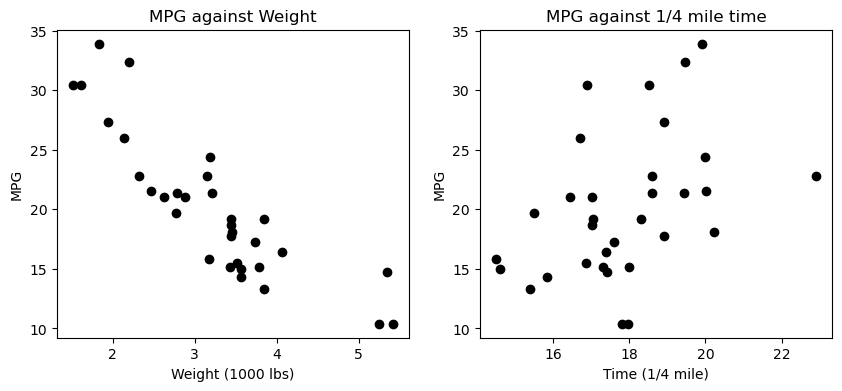

In [10]:
# Plot on each axis
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(df_cars["wt"], df_cars["mpg"], 'o', color='black')
plt.title('MPG against Weight')
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('MPG')

ax = fig.add_subplot(1, 2, 2)
plt.plot(df_cars["qsec"], df_cars["mpg"], 'o', color='black')
plt.title('MPG against 1/4 mile time')
plt.xlabel('Time (1/4 mile)')
plt.ylabel('MPG')

plt.show()